<a href="https://colab.research.google.com/github/rheannlv/MLA_RLV/blob/main/FinalProject_Regression_RLV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Rheann Vera

CS-430 Final Project - Regression

April 24, 2024

**Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn import set_config
from sklearn.model_selection import GridSearchCV

In [ ]:
!pip install chardet
import chardet

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


**Problem 1**

Linear Regression


**Reading the Data**

In [ ]:
with open('/content/gdrive/MyDrive/CS430/bike_data.csv', 'rb') as f:
    encoding = chardet.detect(f.read())['encoding']

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/CS430/bike_data.csv', encoding=encoding)

In [ ]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,1/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,1/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,1/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,1/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,1/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
df.sample(5)

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8199,7/11/2018,848,15,15.4,72,1.1,608,10.3,0.57,0.0,0.0,Autumn,No Holiday,Yes
3290,17/04/2018,237,2,8.4,45,0.9,1987,-2.8,0.00,0.0,0.0,Spring,No Holiday,Yes
6661,4/9/2018,997,13,26.5,58,2.8,2000,17.5,2.87,0.0,0.0,Autumn,No Holiday,Yes
3345,19/04/2018,316,9,12.4,29,1.5,1380,-5.1,1.49,0.0,0.0,Spring,No Holiday,Yes
3589,29/04/2018,1635,13,21.9,27,2.2,1055,2.0,3.35,0.0,0.0,Spring,No Holiday,Yes


**Renaming columns**

In [ ]:
df.rename(columns={'Date':'date', 'Rented Bike Count':'rented_bike_count', 'Hour':'hours_rented',
                   'Temperature(C)':'temp_c', 'Humidity(%)':'humidity', 'Wind speed (m/s)':'wind_speed',
                   'Visibility (10m)':'visibility', 'Dew point temperature(°C)':'dew_point_temp',
                   'Solar Radiation (MJ/m2)':'solar_radiation', 'Rainfall(mm)':'rainfall_mm', 'Snowfall (cm)':'snowfall_cm',
                   'Seasons':'seasons', 'Holiday':'holiday', 'Functioning Day':'functioning_day'}, inplace=True)

In [ ]:
df.describe()

,rented_bike_count,hours_rented,temp_c,humidity,wind_speed,visibility,dew_point_temp,solar_radiation,rainfall_mm,snowfall_cm
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


**Statistical and Visual Exploration**

Text(0, 0.5, '# of bikes rented')

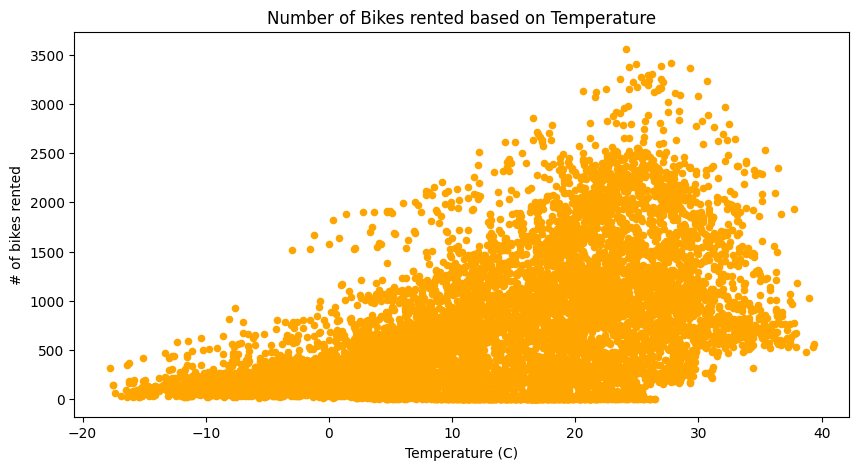

In [ ]:
df.plot(kind='scatter', x='temp_c', y='rented_bike_count', title='Number of Bikes rented based on Temperature', color='orange', figsize=(10,5
))
plt.xlabel("Temperature (C)")
plt.ylabel("# of bikes rented")

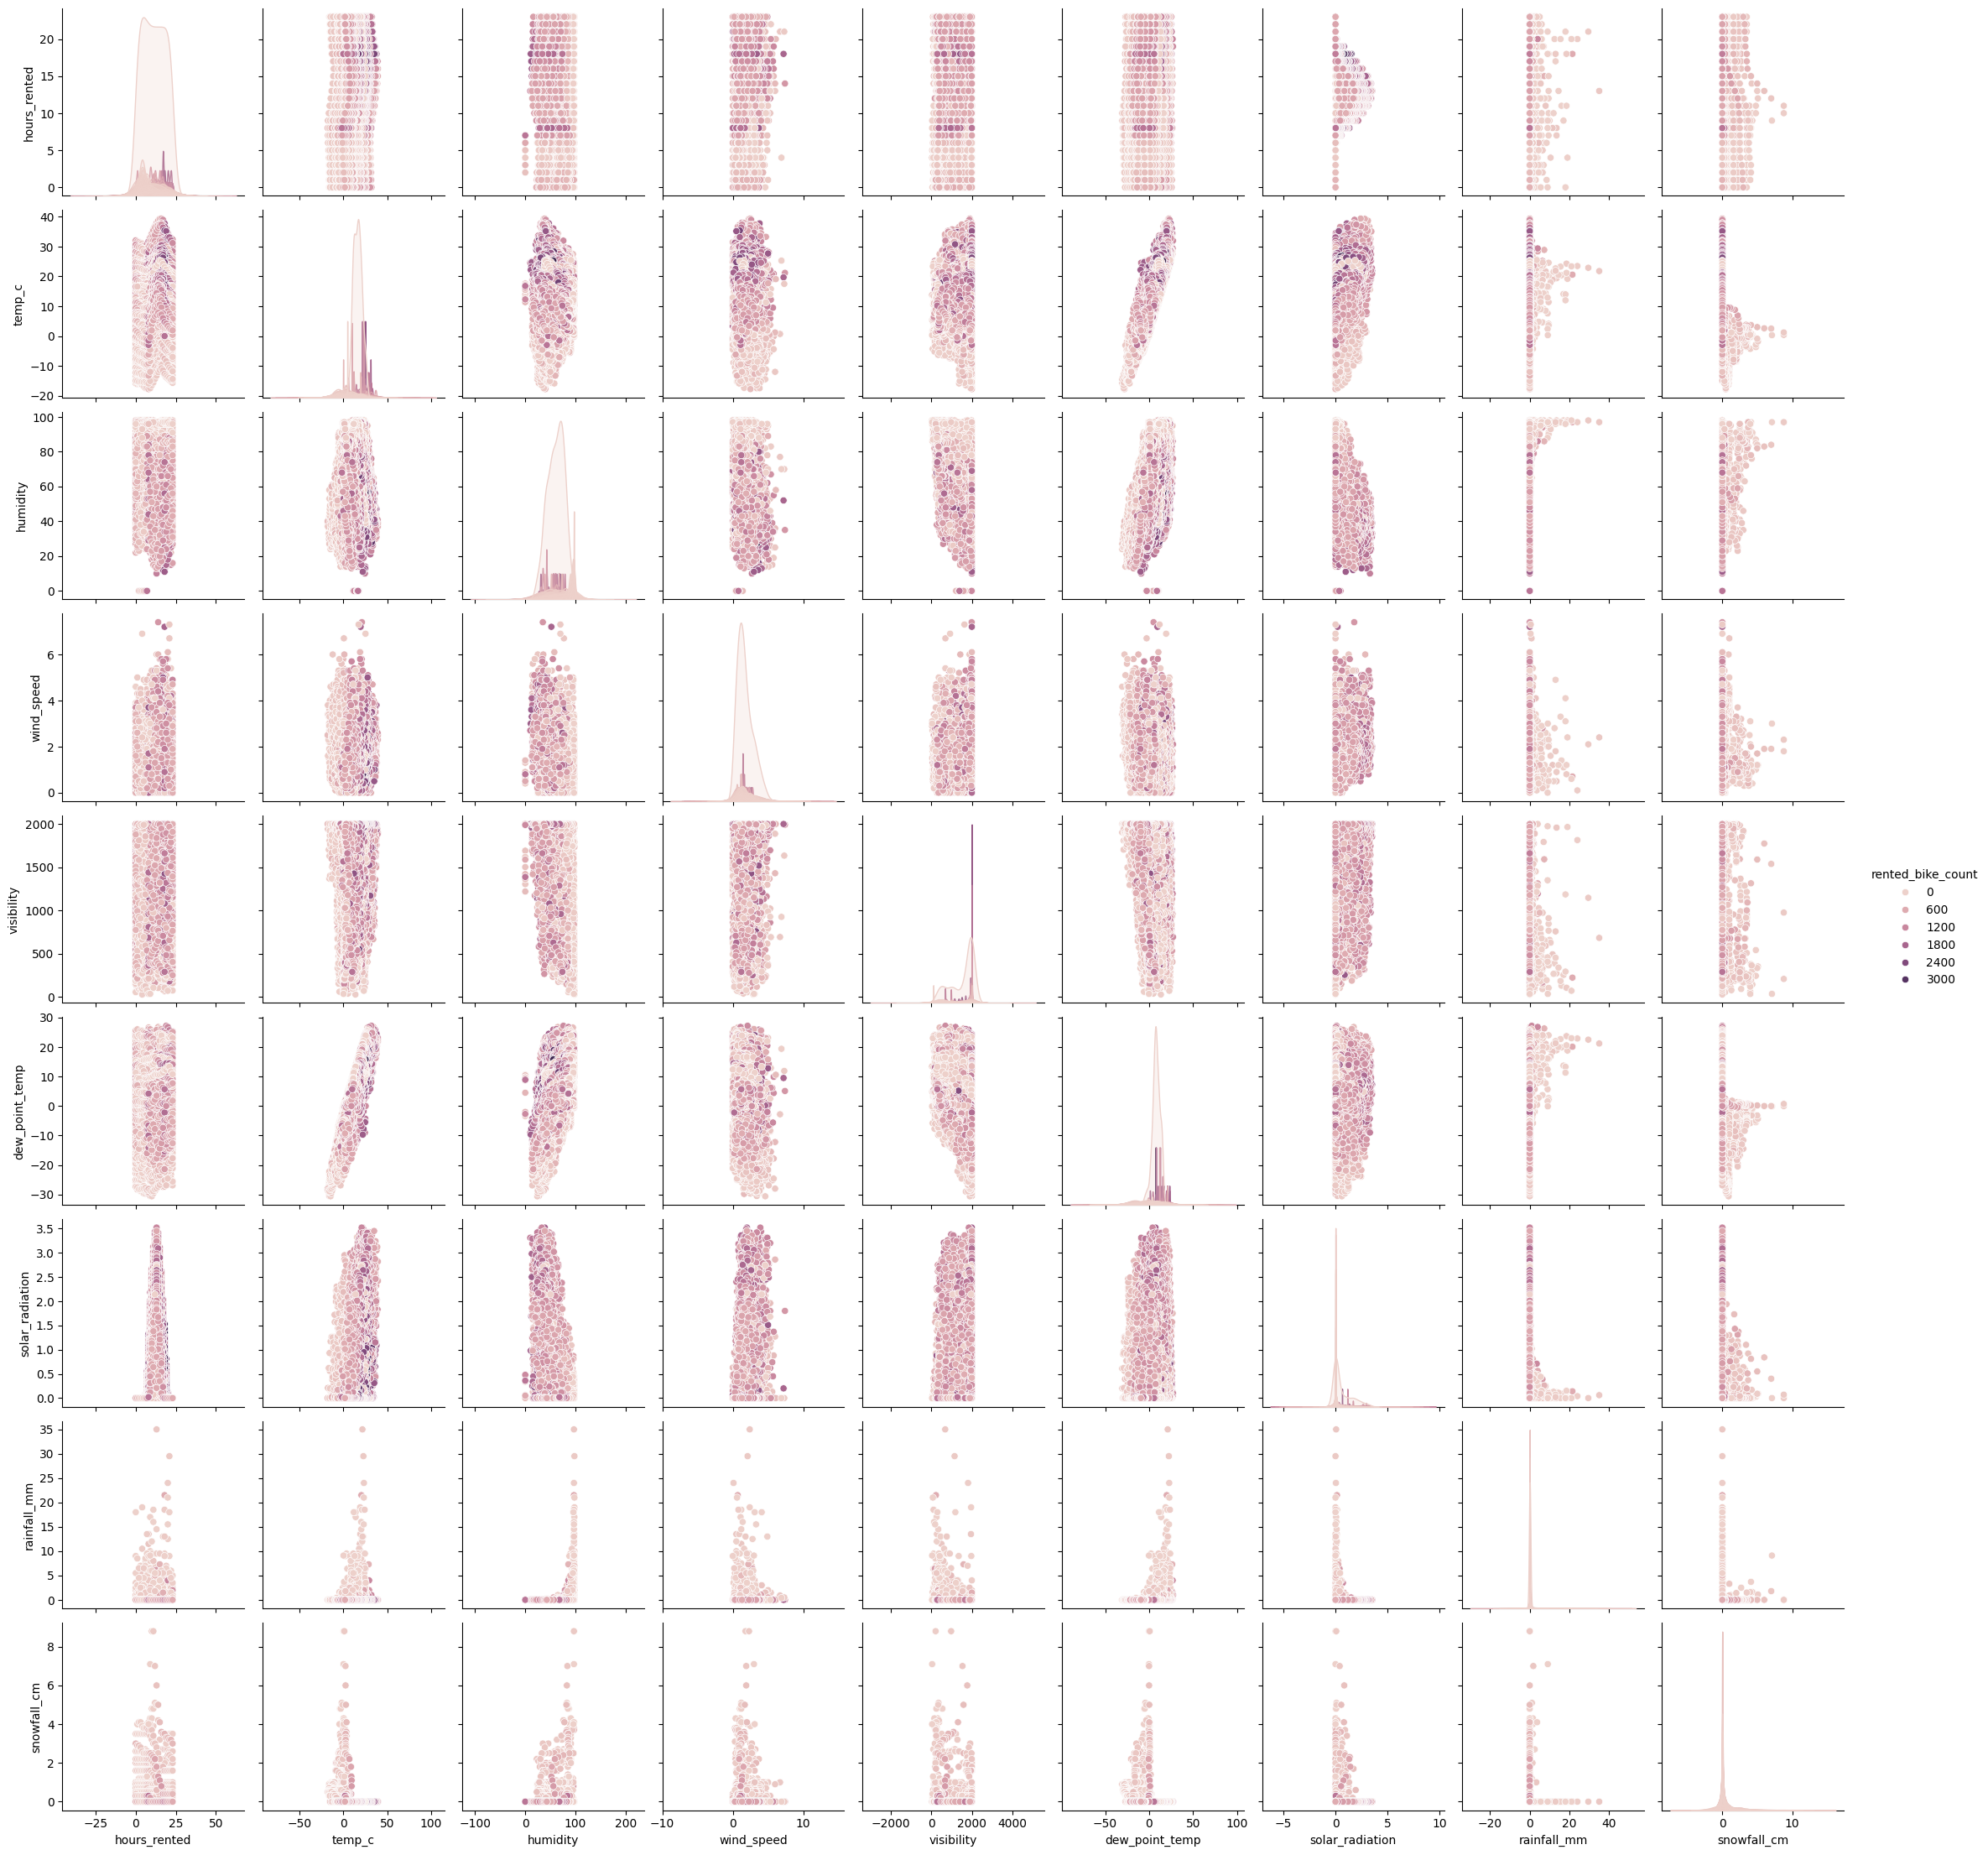

In [ ]:
sns.pairplot(df, diag_kind='kde', hue='rented_bike_count')

**Splitting the Data into Train/Test**

In [ ]:
X = df[['hours_rented', 'temp_c', 'humidity', 'wind_speed', 'visibility', 'dew_point_temp', 'solar_radiation', 'rainfall_mm', 'snowfall_cm',
        'seasons', 'holiday', 'functioning_day']]
y = df[['rented_bike_count']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

**Building the Pipeline**

In [ ]:
num_attribs = ['hours_rented', 'temp_c', 'humidity', 'wind_speed', 'visibility', 'dew_point_temp', 'solar_radiation', 'rainfall_mm', 'snowfall_cm']
cat_attribs = ['seasons', 'holiday', 'functioning_day']

In [ ]:
col_transform = ColumnTransformer(transformers=[
    ('cat',OneHotEncoder(), cat_attribs),
    ('num',MinMaxScaler(), num_attribs),
], remainder='passthrough')

In [ ]:
pipeline = Pipeline([
    ('transform', col_transform),
    ('mlr_model', LinearRegression())
])

In [ ]:
set_config(display='diagram')
pipeline

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat', OneHotEncoder(),
                                                  ['seasons', 'holiday',
                                                   'functioning_day']),
                                                 ('num', MinMaxScaler(),
                                                  ['hours_rented', 'temp_c',
                                                   'humidity', 'wind_speed',
                                                   'visibility',
                                                   'dew_point_temp',
                                                   'solar_radiation',
                                                   'rainfall_mm',
                                                   'snowfall_cm'])])),
                ('mlr_model', LinearRegression())])

**Executing the Model**

In [ ]:
pipeline.fit(X_train,np.ravel(y_train))

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat', OneHotEncoder(),
                                                  ['seasons', 'holiday',
                                                   'functioning_day']),
                                                 ('num', MinMaxScaler(),
                                                  ['hours_rented', 'temp_c',
                                                   'humidity', 'wind_speed',
                                                   'visibility',
                                                   'dew_point_temp',
                                                   'solar_radiation',
                                                   'rainfall_mm',
                                                   'snowfall_cm'])])),
                ('mlr_model', LinearRegression())])

**Evaluating the Model**

In [ ]:
y_pred_test= pipeline.predict(X_test)

In [ ]:
y_pred_train = pipeline.predict(X_train)

In [ ]:
print(mean_squared_error(y_test, y_pred_test)**(0.5))
print(mean_squared_error(y_train, y_pred_train)**(0.5))

437.0945205135998
431.73395103998206


**Conclusion**

The RMSE are high values, noting that this model didn't do well predicting bike rentals.

Support Vector Machine

In [ ]:
from sklearn.svm import SVC, SVR, LinearSVC, LinearSVR

**Splitting Data**

In [ ]:
X = df[['hours_rented', 'temp_c', 'humidity', 'wind_speed', 'visibility', 'dew_point_temp', 'solar_radiation', 'rainfall_mm', 'snowfall_cm',
        'seasons', 'holiday', 'functioning_day']]
y = df[['rented_bike_count']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

**Building Pipeline**

In [ ]:
num_attribs = ['hours_rented', 'temp_c', 'humidity', 'wind_speed', 'visibility', 'dew_point_temp', 'solar_radiation', 'rainfall_mm', 'snowfall_cm']
cat_attribs = ['seasons', 'holiday', 'functioning_day']

In [ ]:
col_transform = ColumnTransformer(transformers=[
    ('cat',OneHotEncoder(), cat_attribs),
    ('num',MinMaxScaler(), num_attribs),
], remainder='passthrough')

In [ ]:
pipeline = Pipeline([
                     ('trans', col_transform),
                     ('SVR', SVR(kernel="linear", C=75, max_iter=100000, epsilon=0.0)),
                     ])

**Executing the Model**

In [ ]:
pipeline.fit(X_train,np.ravel(y_train))

Pipeline(steps=[('trans',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat', OneHotEncoder(),
                                                  ['seasons', 'holiday',
                                                   'functioning_day']),
                                                 ('num', MinMaxScaler(),
                                                  ['hours_rented', 'temp_c',
                                                   'humidity', 'wind_speed',
                                                   'visibility',
                                                   'dew_point_temp',
                                                   'solar_radiation',
                                                   'rainfall_mm',
                                                   'snowfall_cm'])])),
                ('SVR',
                 SVR(C=75, epsilon=0.0, kernel='linear', max_iter=100000))])

**Evaluating the Model**


In [ ]:
y_pred = pipeline.predict(X_test)
y_pred_train = pipeline.predict(X_train)

In [ ]:
print(mean_squared_error(y_test, y_pred)**(0.5))
print(mean_squared_error(y_train,y_pred_train)**(0.5))

450.6861601416761
447.16990739866657


**Conclusion**

With SVM the RMSE values are much higher by about 13 points, so SVM isn't a good model either to predict bike rentals.

**Building the Pipeline - GridSearch**

In [ ]:
num_attribs = ['hours_rented', 'temp_c', 'humidity', 'wind_speed', 'visibility', 'dew_point_temp', 'solar_radiation', 'rainfall_mm', 'snowfall_cm']
cat_attribs = ['seasons', 'holiday', 'functioning_day']

In [ ]:
col_transform = ColumnTransformer(transformers=[
    ('cat',OneHotEncoder(), cat_attribs),
    ('num',MinMaxScaler(), num_attribs),
], remainder='passthrough')

In [ ]:
pipeline = Pipeline([
    ('transform', col_transform),
    ('SVCLinear', SVC())
])

In [ ]:
param_grid = {
    'SVCLinear__kernel': ['linear', 'poly', 'rbf'],
    'SVCLinear__degree': [2, 3, 4],
}

In [ ]:
grid_pipeline = GridSearchCV(pipeline, param_grid)

In [ ]:
grid_pipeline

GridSearchCV(estimator=Pipeline(steps=[('transform',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('cat',
                                                                         OneHotEncoder(),
                                                                         ['seasons',
                                                                          'holiday',
                                                                          'functioning_day']),
                                                                        ('num',
                                                                         MinMaxScaler(),
                                                                         ['hours_rented',
                                                                          'temp_c',
                                                                          'humidity',
                                                                          'wind_speed',
                                                                          'visibility',
                                                                          'dew_point_temp',
                                                                          'solar_radiation',
                                                                          'rainfall_mm',
                                                                          'snowfall_cm'])])),
                                       ('SVCLinear', SVC())]),
             param_grid={'SVCLinear__degree': [2, 3, 4],
                         'SVCLinear__kernel': ['linear', 'poly', 'rbf']})

**Executing the Model**

In [ ]:
grid_pipeline.fit(X_train, np.ravel(y_train))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(estimator=Pipeline(steps=[('transform',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('cat',
                                                                         OneHotEncoder(),
                                                                         ['seasons',
                                                                          'holiday',
                                                                          'functioning_day']),
                                                                        ('num',
                                                                         MinMaxScaler(),
                                                                         ['hours_rented',
                                                                          'temp_c',
                                                                          'humidity',
                                                                          'wind_speed',
                                                                          'visibility',
                                                                          'dew_point_temp',
                                                                          'solar_radiation',
                                                                          'rainfall_mm',
                                                                          'snowfall_cm'])])),
                                       ('SVCLinear', SVC())]),
             param_grid={'SVCLinear__degree': [2, 3, 4],
                         'SVCLinear__kernel': ['linear', 'poly', 'rbf']})

**Evaluating the Model**

In [ ]:
grid_pipeline.best_params_

{'SVCLinear__degree': 4, 'SVCLinear__kernel': 'poly'}

In [ ]:
grid_pipeline.score(X_test, np.ravel(y_test))

0.04337899543378995

In [ ]:
y_pred = grid_pipeline.predict(X_test)
y_pred_train = grid_pipeline.predict(X_train)

In [ ]:
print(mean_squared_error(y_test, y_pred)**(0.5))
print(mean_squared_error(y_train,y_pred_train)**(0.5))

447.07543314565436
442.4611826097724


**Conclusion**

Although the GridSearch parameters did help increase RMSE scores, it didn't help by much. This model doesn't do well predicting bike sharing.